<a href="https://colab.research.google.com/github/emmanuelvaie/google_colab/blob/main/etude_licences.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import auth
auth.authenticate_user()
import pandas as pd
import gspread
from google.auth import default
from gspread_dataframe import set_with_dataframe


creds, _ = default()

gc = gspread.authorize(creds) 

In [ ]:
worksheet_licence = gc.open_by_url('https://docs.google.com/spreadsheets/d/1cifoZq8-5ILJk5-2R3yZWnX52DohTYoG1cYbeo0Gqss/edit#gid=1576518051').sheet1

licences_2022 = worksheet_licence.spreadsheet.worksheet('2022')
# get_all_values gives a list of rows.
rows_licences = licences_2022.get_all_values()

df_licences_2022 = pd.DataFrame.from_records(rows_licences,columns=rows_licences[0])
df_licences_2022 = df_licences_2022.drop(0).reindex()

In [ ]:
df_licences_2022['NO ADHERENT'].count()

390

In [ ]:
df_licences_2022['NO ADHERENT'] = df_licences_2022['NO ADHERENT'].apply(lambda x: x.strip())
df_licences_2022['NO ADHERENT'] = df_licences_2022['NO ADHERENT'].astype('float')
df_licences_2022['NO ADHERENT'] = df_licences_2022['NO ADHERENT'].astype('Int32')

In [ ]:
licences_2023 = worksheet_licence.spreadsheet.worksheet('2023')

# get_all_values gives a list of rows.
rows_licences = licences_2023.get_all_values()

import pandas as pd
df_licences_2023 = pd.DataFrame.from_records(rows_licences,columns=rows_licences[0])
df_licences_2023 = df_licences_2023.drop(0).reindex()

In [ ]:
df_licences_2023['NO ADHERENT'].count()

312

In [ ]:
df_licences_2023['NO ADHERENT'] = df_licences_2023['NO ADHERENT'].apply(lambda x: x.strip())
df_licences_2023['NO ADHERENT'] = df_licences_2023['NO ADHERENT'].astype('float')
df_licences_2023['NO ADHERENT'] = df_licences_2023['NO ADHERENT'].astype('Int32')

In [ ]:
import datetime
now = datetime.datetime.now()
df_licences_2022['AGE'] = df_licences_2022['DATE NAISSANCE'].apply(lambda x: now.year - pd.to_datetime(x).year)
df_licences_2023['AGE'] = df_licences_2023['DATE NAISSANCE'].apply(lambda x: now.year - pd.to_datetime(x).year)

In [ ]:
df_2022 = df_licences_2022[['NO ADHERENT','NOM','PRENOM','EMAIL','AGE']]
df_2023 = df_licences_2023[['NO ADHERENT','NOM','PRENOM','EMAIL','AGE']]

In [ ]:
df = df_2022.join(df_2023.set_index('NO ADHERENT'), on='NO ADHERENT', lsuffix='2022', rsuffix='2023')

In [ ]:
df.head()

,NO ADHERENT,NOM2022,PRENOM2022,EMAIL2022,AGE2022,NOM2023,PRENOM2023,EMAIL2023,AGE2023
1,569783,MARTIN,ARIANE,helene.chauvire@gmail.com,10,NaN,NaN,NaN,NaN
2,566604,JUDAS,ELISA,cindybarrast@gmail.com,11,JUDAS,ELISA,cindybarrast@gmail.com,11.0
3,572683,BUTEAU,LOUIS,valentin.marie0786@orange.fr,11,NaN,NaN,NaN,NaN
4,570218,VIALFONT,RONAN,richard.vialfont@gmail.com,12,NaN,NaN,NaN,NaN
5,571118,CHAPUIS,SALOME,nathalie.venet@gmail.com,12,NaN,NaN,NaN,NaN


In [ ]:
df_lost = df[df['NOM2023'].isna()]
df_lost.head()

,NO ADHERENT,NOM2022,PRENOM2022,EMAIL2022,AGE2022,NOM2023,PRENOM2023,EMAIL2023,AGE2023
1,569783,MARTIN,ARIANE,helene.chauvire@gmail.com,10,NaN,NaN,NaN,NaN
3,572683,BUTEAU,LOUIS,valentin.marie0786@orange.fr,11,NaN,NaN,NaN,NaN
4,570218,VIALFONT,RONAN,richard.vialfont@gmail.com,12,NaN,NaN,NaN,NaN
5,571118,CHAPUIS,SALOME,nathalie.venet@gmail.com,12,NaN,NaN,NaN,NaN
6,569439,LIARD,MATTHIAS,mattirikudo@gmail.com,12,NaN,NaN,NaN,NaN


In [ ]:
nb_rows = df_lost['NO ADHERENT'].count()
nb_cols = len(list(df_lost.columns))

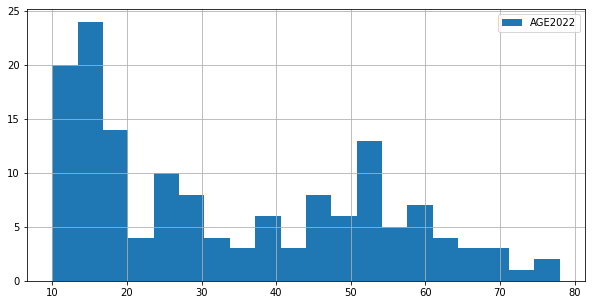

In [ ]:
hist = df_lost['AGE2022'].hist(bins=20, legend=True,figsize =(10,5))

In [ ]:
try :
  licences_reprocessed = worksheet_licence.spreadsheet.worksheet('Lost')
  licences_reprocessed.clear()
except:
  licences_reprocessed = worksheet_licence.spreadsheet.add_worksheet(title='Lost', rows=nb_rows, cols=10)


set_with_dataframe(licences_reprocessed, df_lost)

In [ ]:
df_join = df_2023.join(df_2022.set_index('NO ADHERENT'), on='NO ADHERENT', lsuffix='2023', rsuffix='2022')

In [ ]:
 df_new= df_join[df_join['NOM2022'].isna()]

In [ ]:
try :
  licences_reprocessed = worksheet_licence.spreadsheet.worksheet('New')
  licences_reprocessed.clear()
except:
  licences_reprocessed = worksheet_licence.spreadsheet.add_worksheet(title='New', rows=nb_rows, cols=10)


set_with_dataframe(licences_reprocessed, df_new)

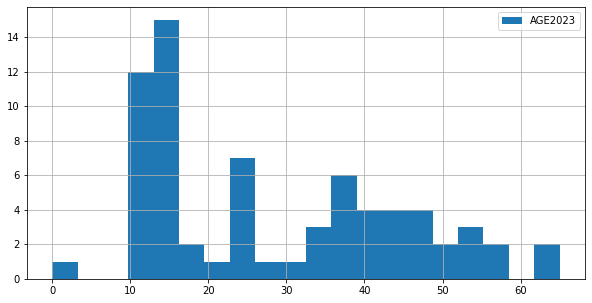

In [ ]:
hist_new = df_new['AGE2023'].hist(bins=20, legend=True,figsize =(10,5))